## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

  import numpy.matlib as npm

  autumn = cm.get_cmap('autumn', 256)

  winter = cm.get_cmap('winter_r', 256)



In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run)
importlib.reload(models.train_val)
importlib.reload(data.data_utils)
importlib.reload(data.data_load)


<module 'data.data_load' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/data/data_load.py'>

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 14.7%
RAM Usage: 10.9%
Available RAM: 897.7G
Total RAM: 1007.0G
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA A100-SXM4-80GB - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [7]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

Number of components for 95% variance PCA: 54
X shape: (179, 7380)
X_pca shape: (179, 54)
X_pca_full shape: (179, 179)
Y_sc shape: (179, 179)
Y_sc_spectralL shape: (179, 183)
Y_sc_spectralA shape: (179, 183)
Y_fc shape: (179, 179)
Coordinates shape: (179, 3)
connectome target FC
Y shape (179, 179)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)
  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



Create sweep with ID: 4v5lndfd
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/4v5lndfd
Initialized sweep with ID: 4v5lndfd
2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'aug_prob': 0.3, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}
Number of learnable parameters in SMT model: 2162315


  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA A100-SXM4-80GB - Memory Allocated: 0.02 GB
Best val loss so far at epoch 1: 0.0382
Epoch 5/110, Train Loss: 0.2200, Val Loss: 0.0463, Time: 2.47s
Epoch 10/110, Train Loss: 0.1378, Val Loss: 0.0569, Time: 2.40s
Epoch 15/110, Train Loss: 0.1183, Val Loss: 0.0404, Time: 2.62s
Best val loss so far at epoch 18: 0.0374
Best val loss so far at epoch 19: 0.0353
Epoch 20/110, Train Loss: 0.0833, Val Loss: 0.0361, Time: 2.38s
Best val loss so far at epoch 21: 0.0346
Best val loss so far at epoch 22: 0.0307
Best val loss so far at epoch 23: 0.0305
Best val loss so far at epoch 24: 0.0300
Best val loss so far at epoch 25: 0.0298
Epoch 25/110, Train Loss: 0.0700, Val Loss: 0.0298, Time: 2.36s
Best val loss so far at epoch 27: 0.0296
Best val loss so far at epoch 28: 0.0289
Epoch 30/110, Train Loss: 0.0716, Val Loss: 0.0297, Time: 2.44s
Best val loss so far at epoch 31: 0.0287
Best val loss so far at epoch 32: 0.0283
Best val loss so far at epoch 33: 0.0282
Epoch 35/

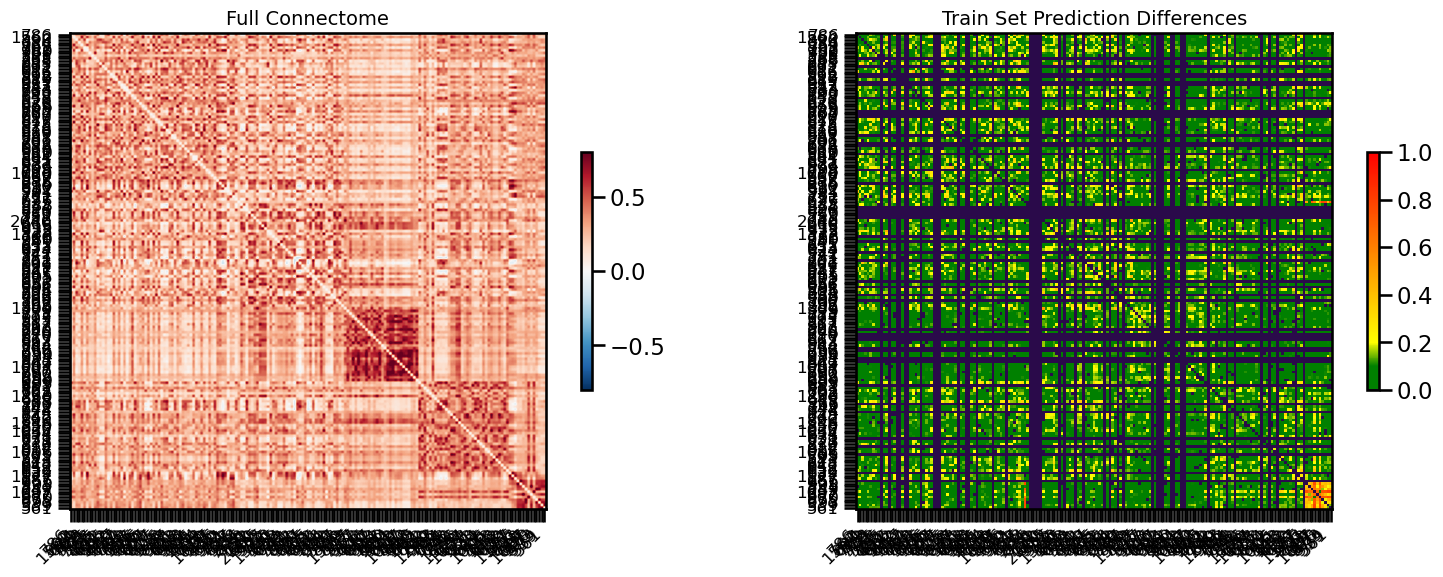

<Figure size 640x480 with 0 Axes>

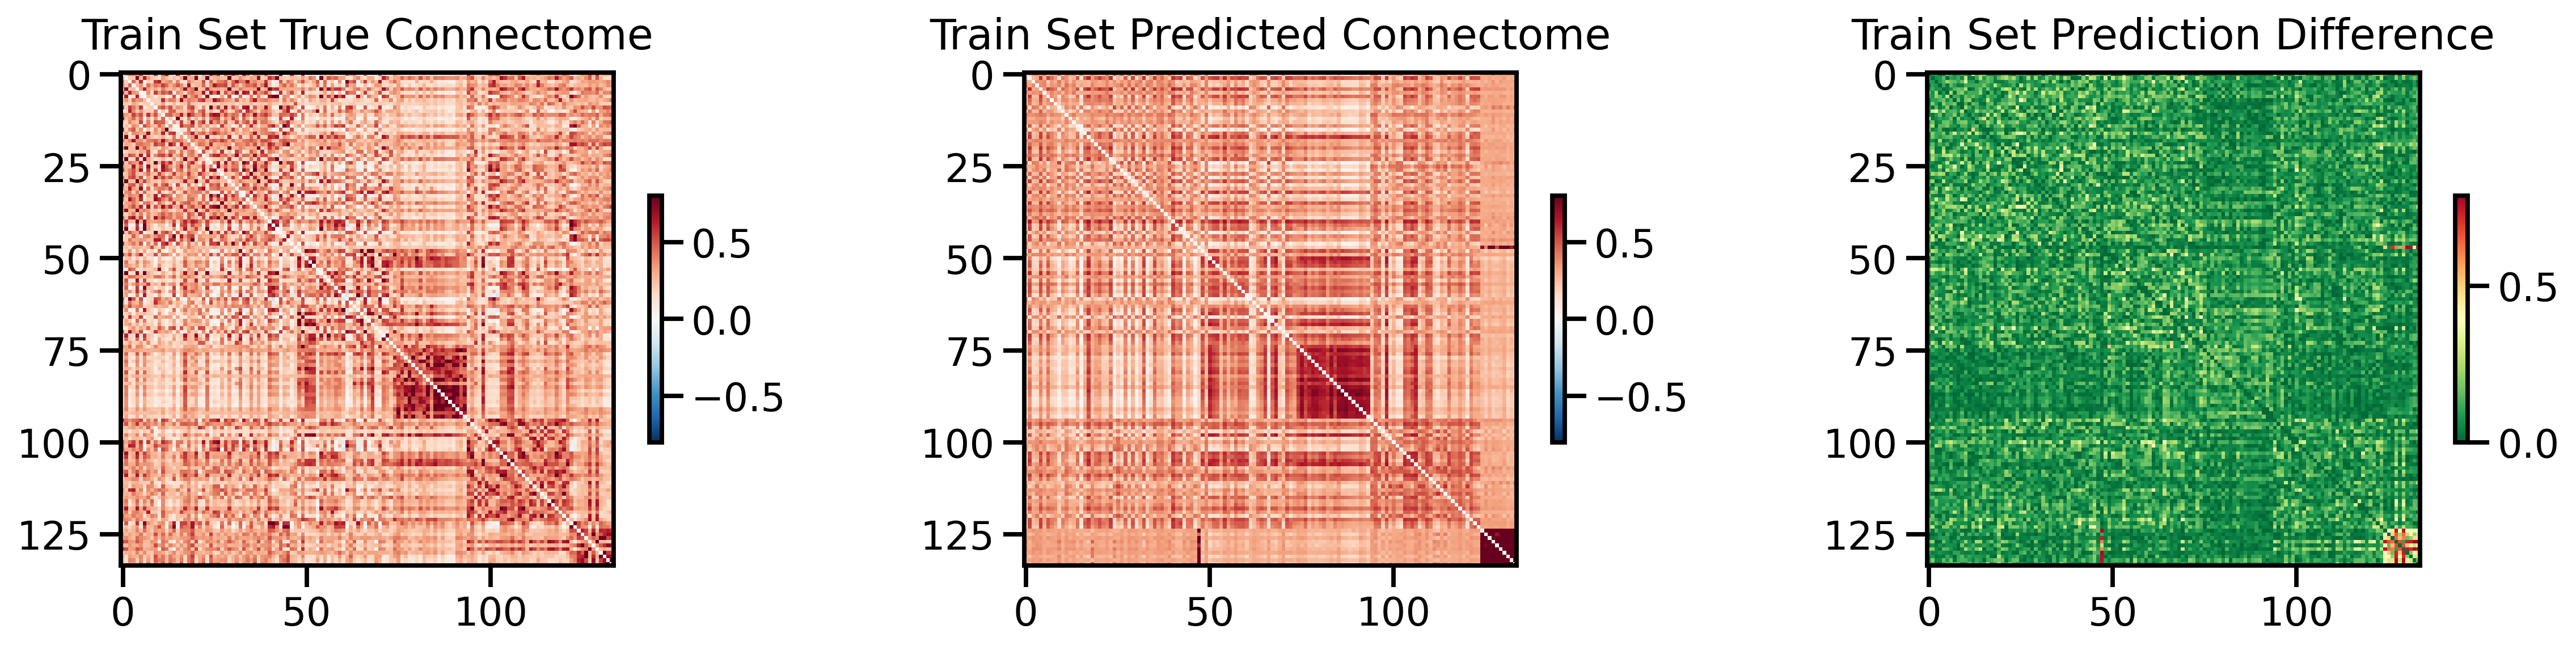

<Figure size 640x480 with 0 Axes>

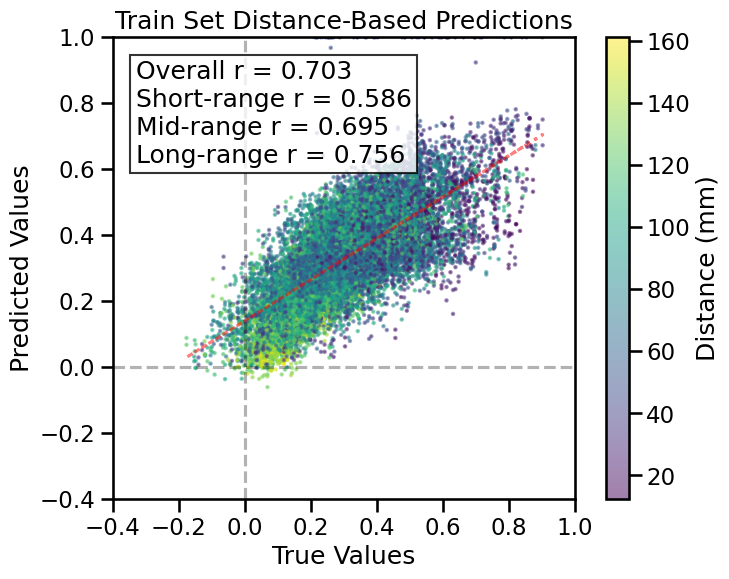

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 45 regions, 1980 connections


<Figure size 640x480 with 0 Axes>

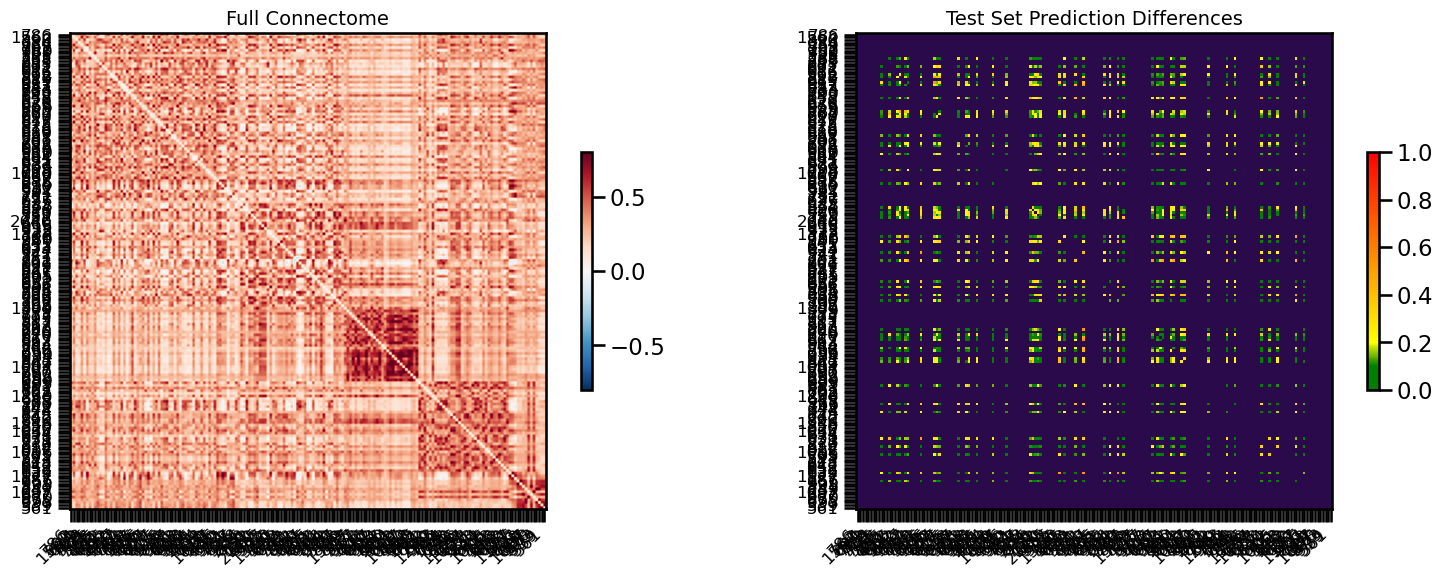

<Figure size 640x480 with 0 Axes>

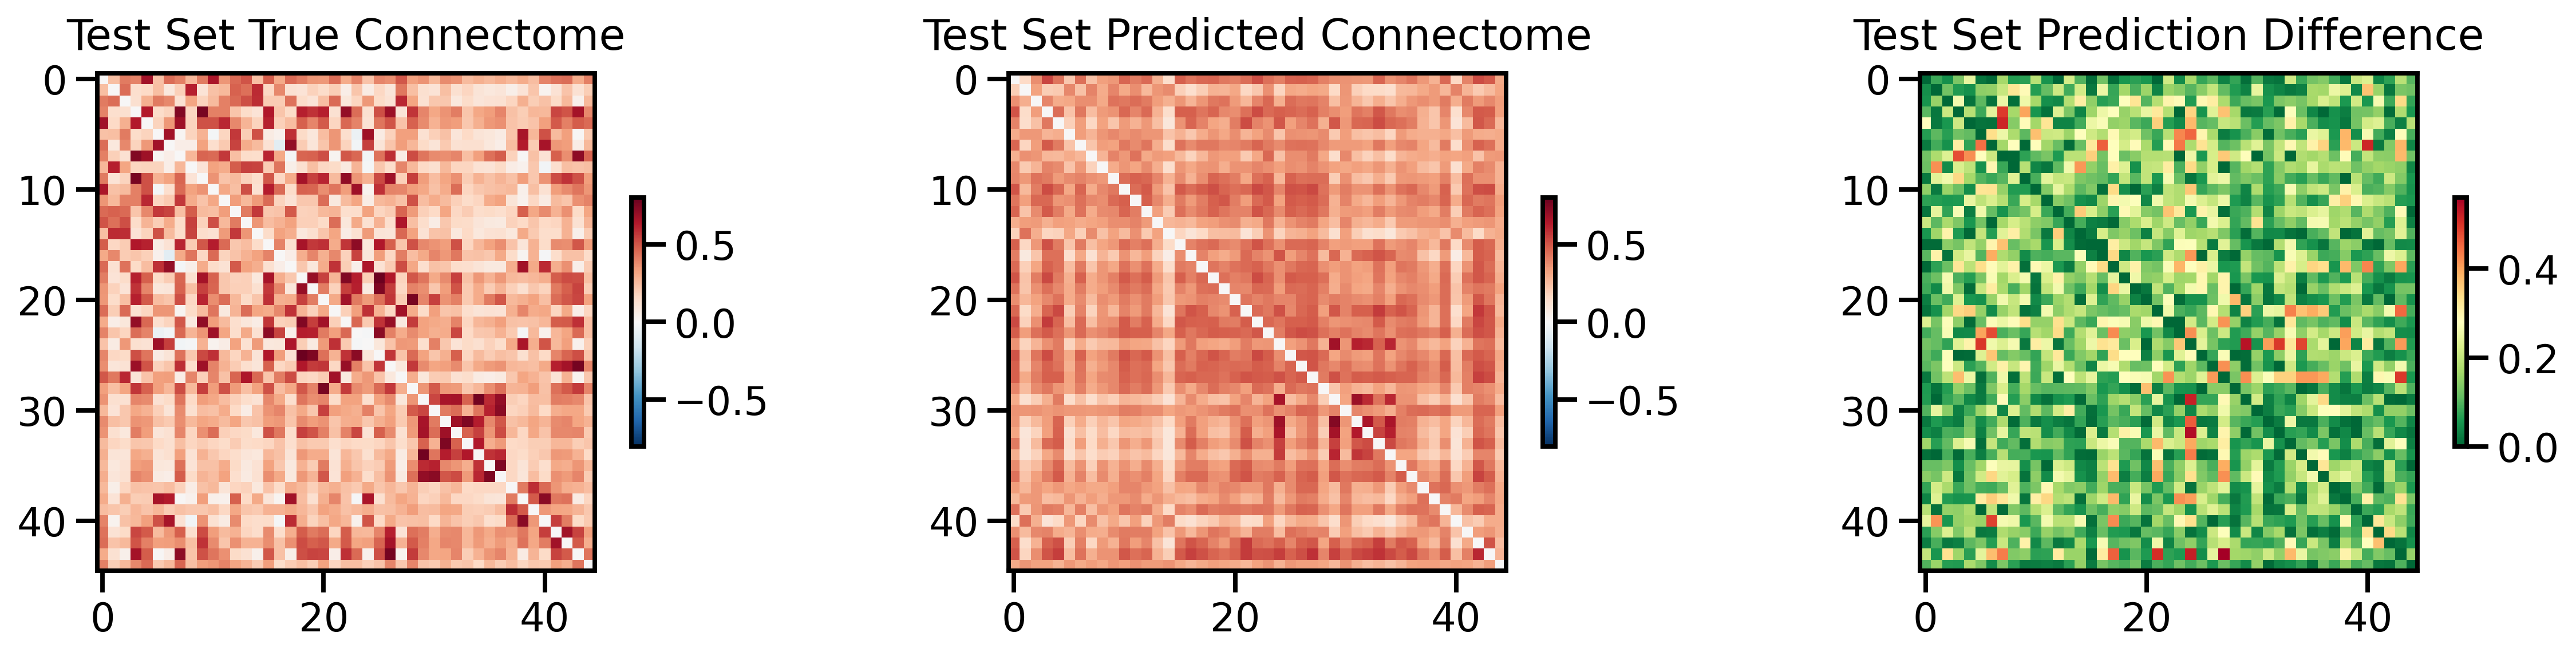

<Figure size 640x480 with 0 Axes>

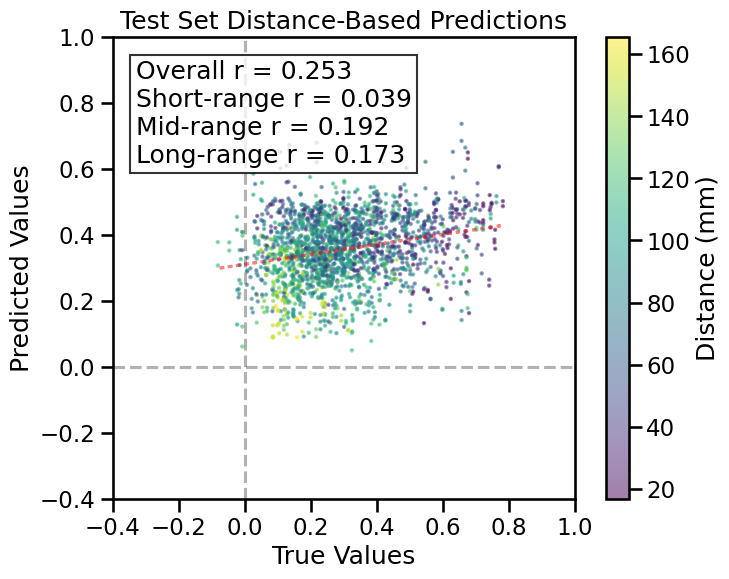

TRAIN METRICS
GLOBAL: mse=0.014793, mae=0.092106, r2=0.4336, pearson_r=0.7026, spearman_r=0.7208, geodesic_distance=10.8571
DISTANCE-BASED: short=0.5857, mid=0.6952, long=0.7562
HEMISPHERIC: left=0.6477, right=0.7147, inter=0.7201
CONNECTION STRENGTH: weak=0.5523, pos=0.4887

TEST METRICS
GLOBAL: mse=0.032897, mae=0.147558, r2=-0.1640, pearson_r=0.2525, spearman_r=0.2380, geodesic_distance=6.0746
DISTANCE-BASED: short=0.0389, mid=0.1923, long=0.1731
HEMISPHERIC: left=0.1804, right=0.1457, inter=0.2792
CONNECTION STRENGTH: weak=0.1034, pos=0.2315

BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'input_dim': 7380, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'use_alibi': True, 'batch_size': 512, 'aug_prob': 0.3, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}


  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 25.9%
RAM Usage: 10.3%
Available RAM: 903.3G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |
Sim complete
Simulation completed in 272.06 seconds (4.53 minutes)


8346

<Figure size 640x480 with 0 Axes>

In [58]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='BHA2',
              parcellation='iPA_183',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True,
              null_model='spin',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()


In [16]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='HCP',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True,
              null_model='spin',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()


Spinning gene expression
Spin index for seed 42: 9
Mean error rank for spin index 9: 263.3333333333333
Number of components for 95% variance PCA: 27
Spinning gene expression
Spin index for seed 42: 9
Mean error rank for spin index 9: 263.3333333333333
Spinning gene expression
Spin index for seed 42: 9
Mean error rank for spin index 9: 263.3333333333333
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 11988, Number of 0s: 195948, Class balance (1s): 0.058
X shape: (455, 7380)
X_pca shape: (455, 27)
X_pca_full shape: (455, 455)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


  return LooseVersion(v) >= LooseVersion(check)

ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: q6tikzpq
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/q6tikzpq
Initialized sweep with ID: q6tikzpq
2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'aug_prob': 0.0, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}


  warnings.warn(



Number of learnable parameters in SMT model: 2162315


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.01 GB
Best val loss so far at epoch 1: 0.0255
Best val loss so far at epoch 2: 0.0242
Best val loss so far at epoch 3: 0.0241
Epoch 5/110, Train Loss: 0.0357, Val Loss: 0.0257, Time: 5.22s
Best val loss so far at epoch 6: 0.0229
Best val loss so far at epoch 9: 0.0228
Best val loss so far at epoch 10: 0.0221
Epoch 10/110, Train Loss: 0.0274, Val Loss: 0.0221, Time: 5.13s
Best val loss so far at epoch 14: 0.0218
Epoch 15/110, Train Loss: 0.0249, Val Loss: 0.0226, Time: 5.09s
Epoch 20/110, Train Loss: 0.0204, Val Loss: 0.0221, Time: 5.04s
Epoch 25/110, Train Loss: 0.0133, Val Loss: 0.0280, Time: 4.95s
Epoch 30/110, Train Loss: 0.0096, Val Loss: 0.0281, Time: 4.94s
Epoch 35/110, Train Loss: 0.0063, Val Loss: 0.0294, Time: 4.91s

LR REDUCED: 0.000090 → 0.000027 at Val Loss: 0.028948
Epoch 40/110, Train Loss: 0.0047, Val Loss: 0.0292, Time: 5.07s


Exception ignored in: <function _releaseLock at 0x14e9c5788ea0>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.11/logging/__init__.py", line 237, in _releaseLock
    def _releaseLock():
    
KeyboardInterrupt: 


Epoch 45/110, Train Loss: 0.0042, Val Loss: 0.0299, Time: 4.94s
Epoch 50/110, Train Loss: 0.0039, Val Loss: 0.0292, Time: 5.27s


Exception ignored in: Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.11/site-packages/wandb/sdk/lib/redirect.py", line 648, in write
    cb(data)
  File "/ext3/miniconda3/lib/python3.11/site-packages/wandb/sdk/wandb_run.py", line 2386, in <lambda>
    lambda data: self._console_raw_callback("stderr", data),
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/ext3/miniconda3/lib/python3.11/site-packages/wandb/sdk/wandb_run.py", line 403, in wrapper_fn
    return func(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt: 
Exception ignored in: <function ExactWeakKeyDictionary.__setitem__.<locals>.<lambda> at 0x14e999d62ac0>
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.11/site-packages/torch/_dynamo/utils.py", line 478, in <lambda>
    self.refs[idx] = weakref.ref(key, lambda ref: self._remove_id(idx))

KeyboardInterrup

KeyboardInterrupt: 

In [8]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='HCP',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()


Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 11988, Number of 0s: 195948, Class balance (1s): 0.058
X shape: (455, 7380)
X_pca shape: (455, 27)
X_pca_full shape: (455, 455)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


  return LooseVersion(v) >= LooseVersion(check)

ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: jnjpmo5w
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/jnjpmo5w
Initialized sweep with ID: jnjpmo5w
2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'aug_prob': 0.0, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}


  warnings.warn(



Number of learnable parameters in SMT model: 2162315


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.01 GB
Best val loss so far at epoch 1: 0.0311
Best val loss so far at epoch 2: 0.0250
Best val loss so far at epoch 4: 0.0230
Best val loss so far at epoch 5: 0.0229
Epoch 5/110, Train Loss: 0.0332, Val Loss: 0.0229, Time: 6.07s
Best val loss so far at epoch 7: 0.0197
Best val loss so far at epoch 8: 0.0185
Best val loss so far at epoch 9: 0.0176
Epoch 10/110, Train Loss: 0.0192, Val Loss: 0.0177, Time: 6.55s
Best val loss so far at epoch 11: 0.0173
Best val loss so far at epoch 12: 0.0171
Best val loss so far at epoch 14: 0.0160
Best val loss so far at epoch 15: 0.0156
Epoch 15/110, Train Loss: 0.0113, Val Loss: 0.0156, Time: 6.52s
Epoch 20/110, Train Loss: 0.0074, Val Loss: 0.0157, Time: 6.62s
Best val loss so far at epoch 21: 0.0152
Best val loss so far at epoch 22: 0.0147


KeyboardInterrupt: 

In [9]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='BHA2',
              parcellation='iPA_729',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()


Number of components for 95% variance PCA: 178
X shape: (562, 7380)
X_pca shape: (562, 178)
X_pca_full shape: (562, 562)
Y_sc shape: (562, 562)
Y_sc_spectralL shape: (562, 729)
Y_sc_spectralA shape: (562, 729)
Y_fc shape: (562, 562)
Coordinates shape: (562, 3)
connectome target FC
Y shape (562, 562)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: 5c8dc41w
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/5c8dc41w
Initialized sweep with ID: 5c8dc41w


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'aug_prob': 0.3, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}
Number of learnable parameters in SMT model: 2162315


  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.14 GB
Best val loss so far at epoch 1: 0.0460
Best val loss so far at epoch 2: 0.0235
Best val loss so far at epoch 3: 0.0197
Epoch 5/110, Train Loss: 0.0457, Val Loss: 0.0217, Time: 11.09s
Best val loss so far at epoch 7: 0.0196
Epoch 10/110, Train Loss: 0.0348, Val Loss: 0.0239, Time: 10.79s
Best val loss so far at epoch 14: 0.0190
Epoch 15/110, Train Loss: 0.0298, Val Loss: 0.0396, Time: 10.82s
Best val loss so far at epoch 16: 0.0189
Best val loss so far at epoch 17: 0.0181
Best val loss so far at epoch 18: 0.0176
Best val loss so far at epoch 19: 0.0171
Epoch 20/110, Train Loss: 0.0241, Val Loss: 0.0185, Time: 10.54s
Best val loss so far at epoch 21: 0.0169
Epoch 25/110, Train Loss: 0.0241, Val Loss: 0.0172, Time: 10.73s
Best val loss so far at epoch 26: 0.0159
Epoch 30/110, Train Loss: 0.0214, Val Loss: 0.0170, Time: 10.47s
Best val loss so far at epoch 32: 0.0149


Exception in thread Thread-121 (_pin_memory_loop):
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/ext3/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/ext3/miniconda3/lib/python3.11/site-packages/torch/utils/data/_utils/pin_memory.py", line 55, in _pin_memory_loop
    do_one_step()
  File "/ext3/miniconda3/lib/python3.11/site-packages/torch/utils/data/_utils/pin_memory.py", line 32, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/ext3/miniconda3/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/ext3/miniconda3/lib/python3.11/site-packages/torch/multiprocessing/reductions.py", line 496, in rebuild_storage_fd
    fd = df.detach()
         ^^^^^^^^^^^

KeyboardInterrupt: 

In [10]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='BHA2',
              parcellation='iPA_729',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=3,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True,
              null_model='spin',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()


Number of components for 95% variance PCA: 178
X shape: (562, 7380)
X_pca shape: (562, 178)
X_pca_full shape: (562, 562)
Y_sc shape: (562, 562)
Y_sc_spectralL shape: (562, 729)
Y_sc_spectralA shape: (562, 729)
Y_fc shape: (562, 562)
Coordinates shape: (562, 3)
connectome target FC
Y shape (562, 562)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: pu7kul1y
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/pu7kul1y
Initialized sweep with ID: pu7kul1y


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'aug_prob': 0.3, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}
Number of learnable parameters in SMT model: 2162315


  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.11 GB
Best val loss so far at epoch 1: 0.0547
Best val loss so far at epoch 2: 0.0271
Best val loss so far at epoch 3: 0.0241
Best val loss so far at epoch 4: 0.0239
Epoch 5/110, Train Loss: 0.0444, Val Loss: 0.0239, Time: 11.99s
Best val loss so far at epoch 7: 0.0236
Best val loss so far at epoch 8: 0.0230
Epoch 10/110, Train Loss: 0.0400, Val Loss: 0.0251, Time: 11.78s
Best val loss so far at epoch 12: 0.0224
Best val loss so far at epoch 14: 0.0221
Epoch 15/110, Train Loss: 0.0339, Val Loss: 0.0234, Time: 11.33s
Best val loss so far at epoch 18: 0.0212
Epoch 20/110, Train Loss: 0.0279, Val Loss: 0.0224, Time: 10.85s
Best val loss so far at epoch 24: 0.0211
Epoch 25/110, Train Loss: 0.0270, Val Loss: 0.0215, Time: 11.37s
Epoch 30/110, Train Loss: 0.0264, Val Loss: 0.0224, Time: 11.47s


Exception in thread Thread-185 (_pin_memory_loop):
Traceback (most recent call last):
  File "/ext3/miniconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/ext3/miniconda3/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/ext3/miniconda3/lib/python3.11/site-packages/torch/utils/data/_utils/pin_memory.py", line 55, in _pin_memory_loop
    do_one_step()
  File "/ext3/miniconda3/lib/python3.11/site-packages/torch/utils/data/_utils/pin_memory.py", line 32, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/ext3/miniconda3/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/ext3/miniconda3/lib/python3.11/site-packages/torch/multiprocessing/reductions.py", line 496, in rebuild_storage_fd
    fd = df.detach()
         ^^^^^^^^^^^

KeyboardInterrupt: 

In [ ]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='BHA2',
              parcellation='iPA_729',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True,
              null_model='spin',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()


In [9]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='HCP',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer_cls',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()


Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 11988, Number of 0s: 195948, Class balance (1s): 0.058
X shape: (455, 7380)
X_pca shape: (455, 27)
X_pca_full shape: (455, 455)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


  return LooseVersion(v) >= LooseVersion(check)

ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: apkrpjcb
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/apkrpjcb
Initialized sweep with ID: apkrpjcb
2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'cls_init': 'spatial_learned', 'transformer_dropout': 0.2, 'dropout_rate': 0.3, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'aug_prob': 0.3, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}


  warnings.warn(



Number of learnable parameters in SMT w/ CLS model: 2173067


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA A100-SXM4-80GB - Memory Allocated: 0.01 GB
Best val loss so far at epoch 1: 0.0318
Best val loss so far at epoch 2: 0.0268
Best val loss so far at epoch 3: 0.0250
Best val loss so far at epoch 4: 0.0228
Best val loss so far at epoch 5: 0.0219
Epoch 5/110, Train Loss: 0.0757, Val Loss: 0.0219, Time: 10.81s
Best val loss so far at epoch 7: 0.0219
Best val loss so far at epoch 8: 0.0212


KeyboardInterrupt: 

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
X_pca_full shape: (455, 455)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
connectome target FC
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


  return LooseVersion(v) >= LooseVersion(check)

ERROR: Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin
wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: ju71hwqv
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/ju71hwqv
Initialized sweep with ID: ju71hwqv
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 60, 'd_model': 128, 'encoder_output_dim': 1, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'batch_size': 512, 'aug_prob': 0.3, 'aug_style': 'curriculum_swap_linear_decay', 'epochs': 110, 'num_workers': 2, 'prefetch_factor': 4}


  warnings.warn(



Number of learnable parameters in SMT model: 1027586


  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA A100-SXM4-80GB - Memory Allocated: 0.00 GB
Best val loss so far at epoch 1: 0.0391
Best val loss so far at epoch 2: 0.0188
Best val loss so far at epoch 3: 0.0147
Best val loss so far at epoch 4: 0.0115
Best val loss so far at epoch 5: 0.0094
Epoch 5/110, Train Loss: 0.0687, Val Loss: 0.0094, Time: 18.69s
Epoch 10/110, Train Loss: 0.0472, Val Loss: 0.0130, Time: 16.95s
Best val loss so far at epoch 14: 0.0073
Best val loss so far at epoch 15: 0.0072
Epoch 15/110, Train Loss: 0.0432, Val Loss: 0.0072, Time: 17.96s
Best val loss so far at epoch 16: 0.0062
Best val loss so far at epoch 18: 0.0058
Best val loss so far at epoch 19: 0.0051
Epoch 20/110, Train Loss: 0.0358, Val Loss: 0.0068, Time: 18.19s
Best val loss so far at epoch 21: 0.0042
Epoch 25/110, Train Loss: 0.0356, Val Loss: 0.0055, Time: 16.57s
Best val loss so far at epoch 29: 0.0037
Epoch 30/110, Train Loss: 0.0290, Val Loss: 0.0047, Time: 15.24s
Epoch 35/110, Train Loss: 0.0272, Val Loss: 0.00

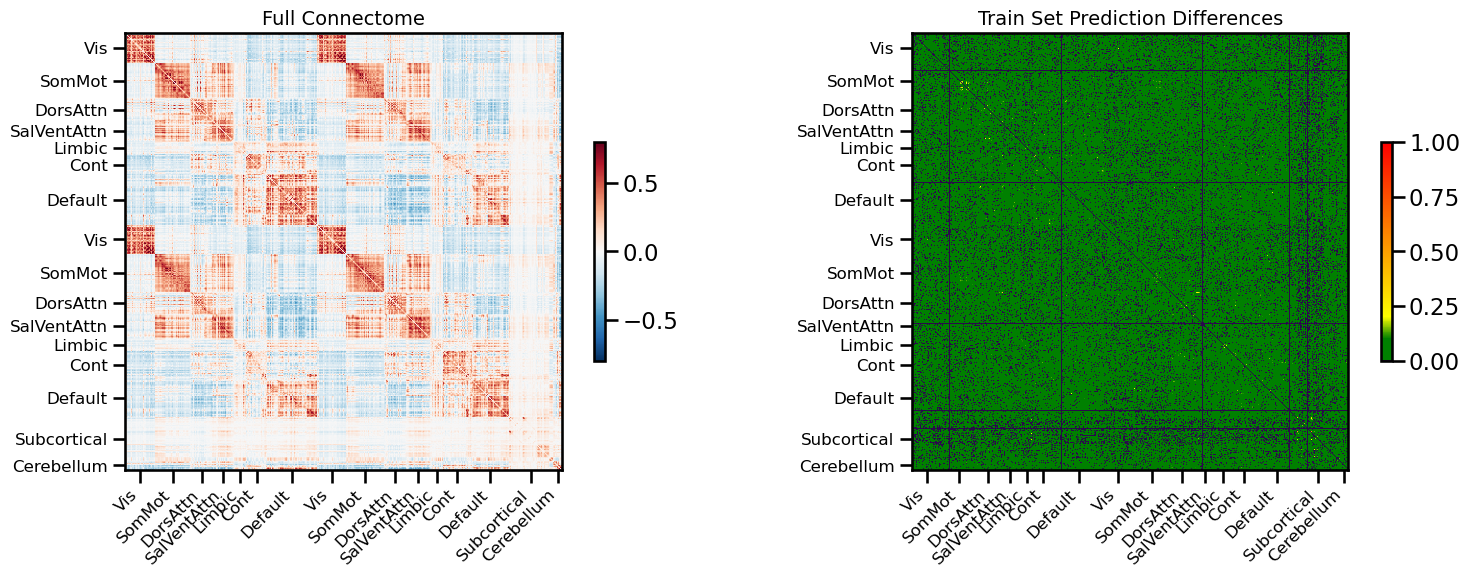

<Figure size 640x480 with 0 Axes>

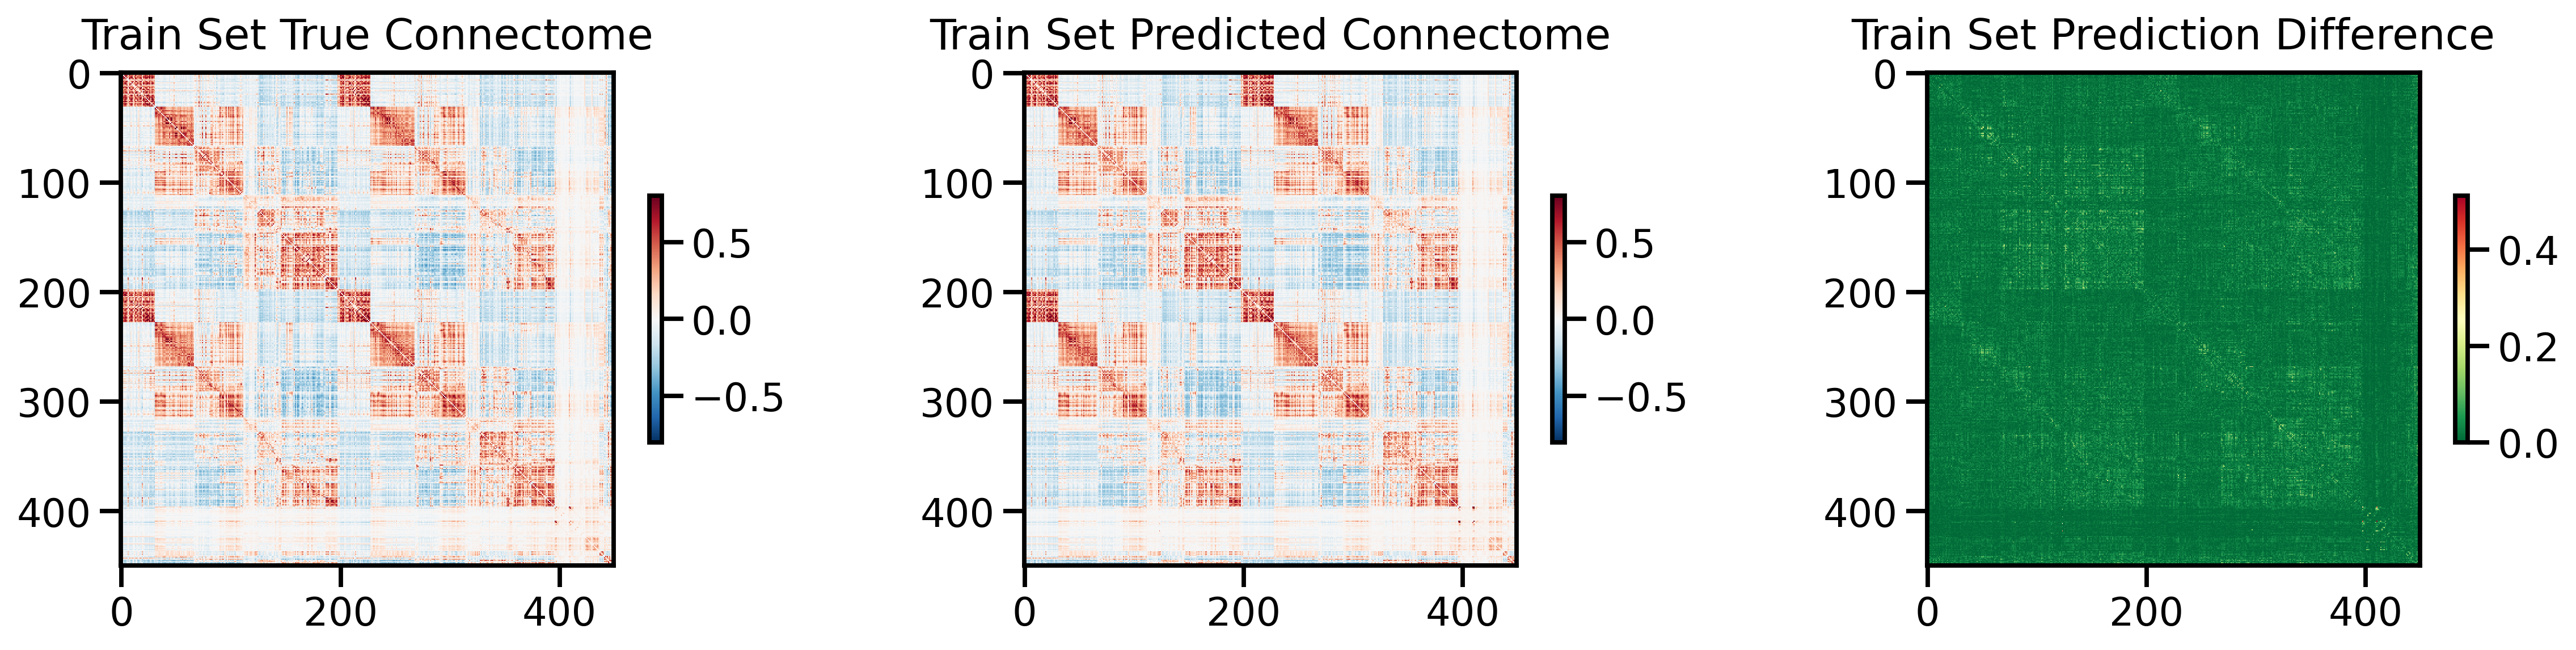

<Figure size 640x480 with 0 Axes>

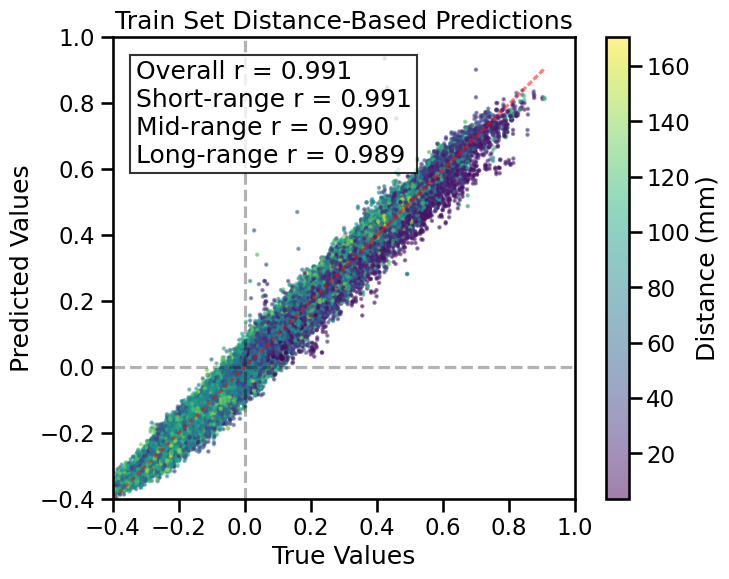

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 5 regions, 20 connections


<Figure size 640x480 with 0 Axes>

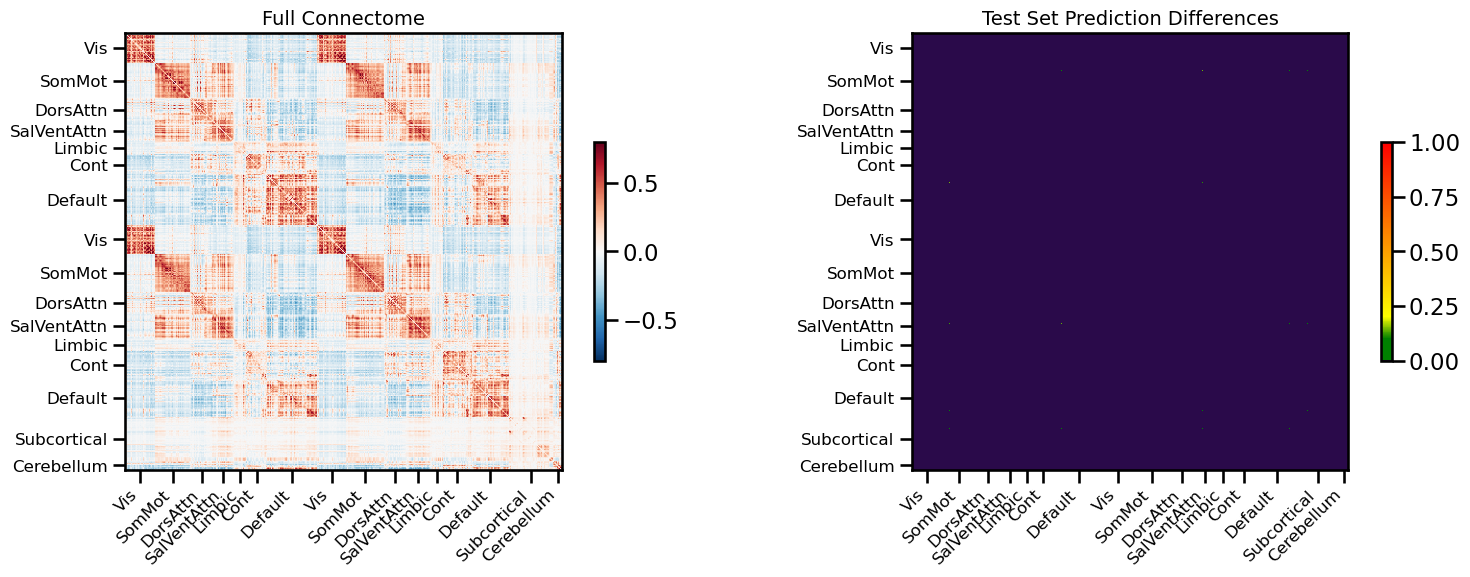

<Figure size 640x480 with 0 Axes>

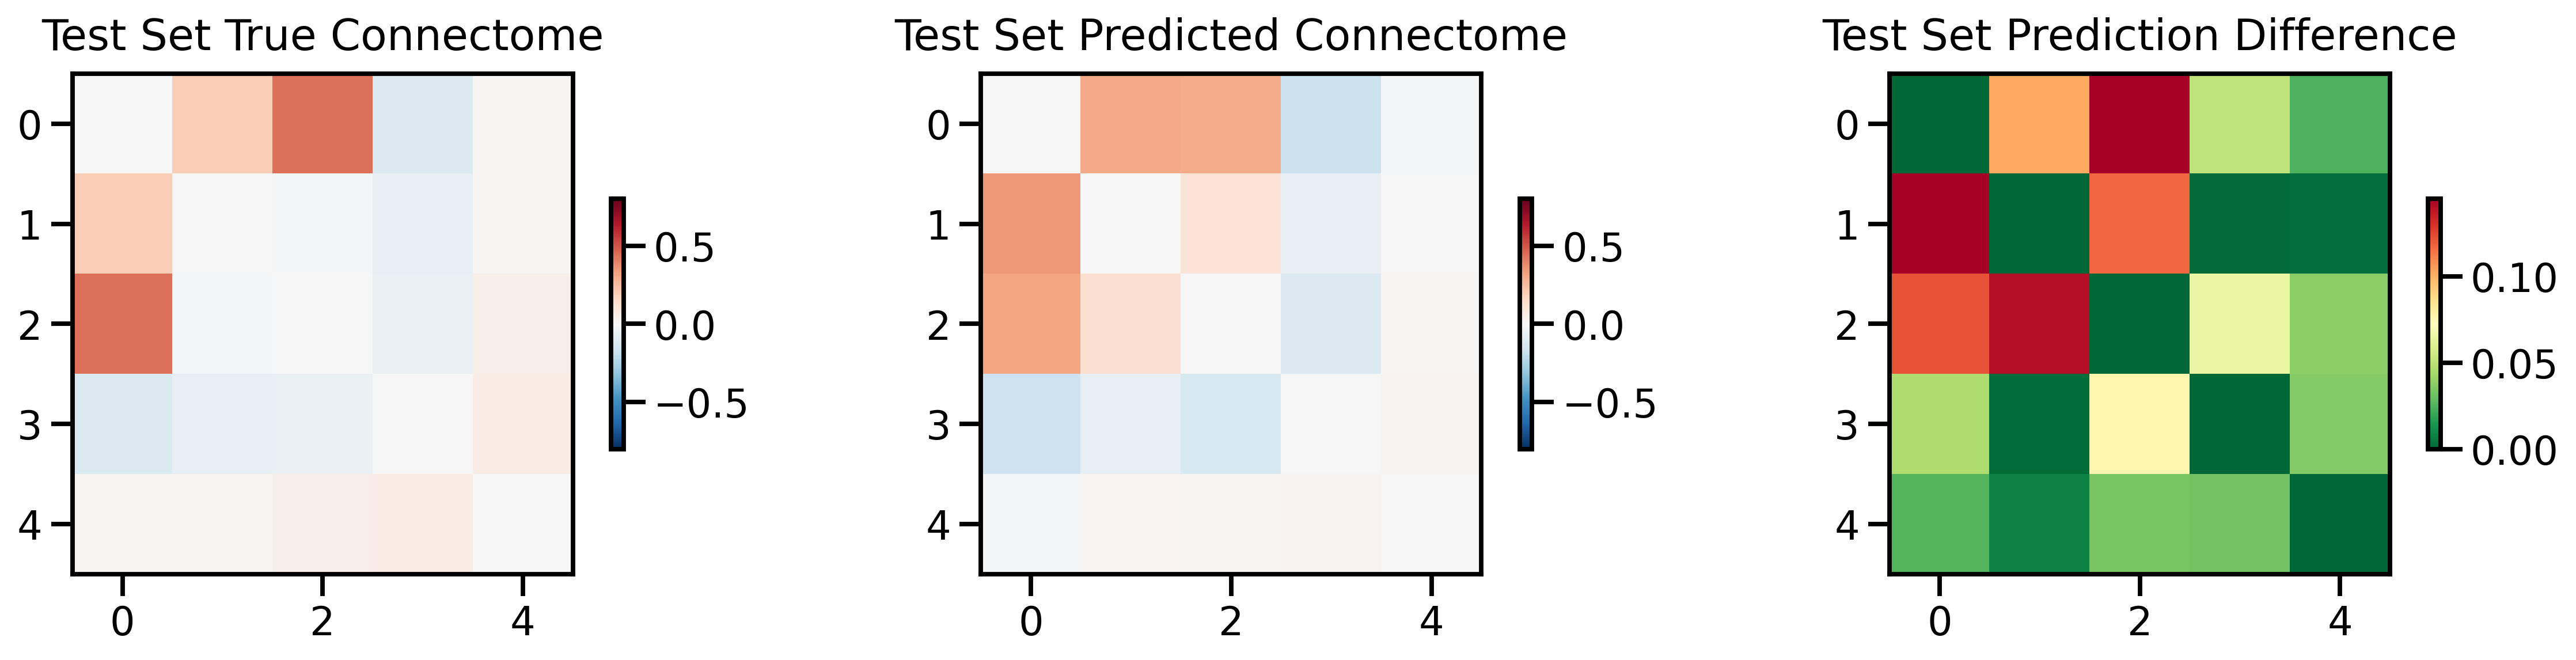

<Figure size 640x480 with 0 Axes>

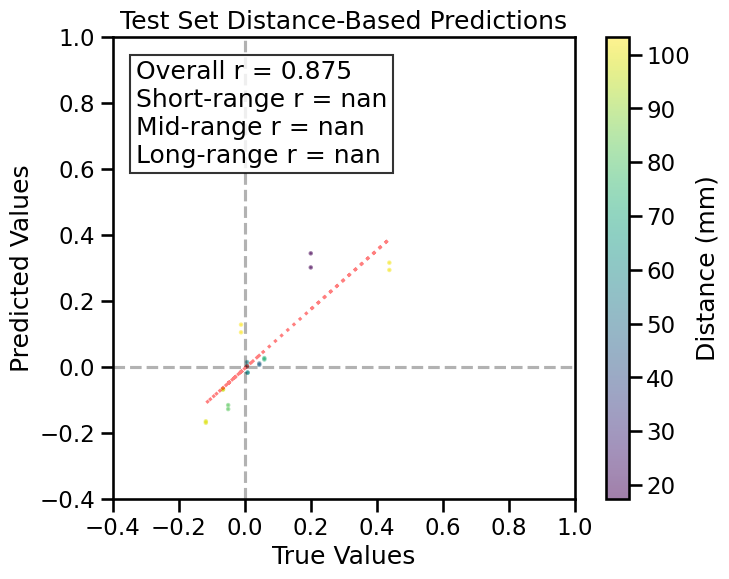

TRAIN METRICS
GLOBAL: mse=0.000631, mae=0.018472, r2=0.9812, pearson_r=0.9907, spearman_r=0.9878, geodesic_distance=15.9209
DISTANCE-BASED: short=0.9910, mid=0.9901, long=0.9891
HEMISPHERIC: left=0.9900, right=0.9913, inter=0.9918
CONNECTION STRENGTH: neg=0.8099, weak=0.9833, pos=0.9391
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.9919    0.9920
  Default       0.9858    0.9902
  SalVentAttn    0.9891    0.9908
  Limbic        0.9921    0.9922
  DorsAttn      0.9934    0.9925
  SomMot        0.9931    0.9928
  Vis           0.9935    0.9918
  Subcortical    0.9922    0.9905
  Cerebellum    0.9871    0.9915

TEST METRICS
GLOBAL: mse=0.006052, mae=0.060522, r2=0.7394, pearson_r=0.8747, spearman_r=0.8302, geodesic_distance=3.0899
HEMISPHERIC: left=0.9979, inter=0.9112
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Default          N/A    0.8572
  SalVentAttn       N/A    0.9551
  SomMot  

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 9.5%
RAM Usage: 10.9%
Available RAM: 897.6G
Total RAM: 1007.0G
| ID | GPU | MEM |
------------------
|  0 |  0% |  2% |
Sim complete
Simulation completed in 1916.66 seconds (31.94 minutes)


12445

<Figure size 640x480 with 0 Axes>

In [8]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random_full',
              random_seed=42,
              search_method=('wandb', 'mse', 2),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer',
              use_gpu=True,
              null_model='none',
              use_folds=[0], 
              save_model='UKBB_smt_full_final_compressed'
)

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()
